# HR analytics

**Цели проекта:**
1. Построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика;
2. Построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

**Описание данных:**
- `id` — уникальный идентификатор сотрудника;
- `dept` — отдел, в котором работает сотрудник;
- `level` — уровень занимаемой должности;
- `workload` — уровень загруженности сотрудника;
- `employment_years` — длительность работы в компании (в годах);
- `last_year_promo` — показывает, было ли повышение за последний год;
- `last_year_violations` — показывает, нарушал ли сотрудник трудовой договор за последний год;
- `supervisor_evaluation` — оценка качества работы сотрудника, которую дал руководитель;
- `salary` — ежемесячная зарплата сотрудника;
- `job_satisfaction_rate` — уровень удовлетворённости сотрудника работой в компании, целевой признак.

**План проекта:**

**Задача 1: предсказание уровня удовлетворённости сотрудника**
1. Загрузка данных
2. Предобработка данных
3. Исследовательский анализ данных
5. Подготовка данных
6. Обучение модели
7. Выводы

**Задача 2: предсказание увольнения сотрудника из компании**
1. Загрузка данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Добавление нового входного признака
5. Подготовка данных
6. Обучение модели
7. Выводы

**Общие выводы**


## Предсказание уровня удовлетворённости сотрудника

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# импорт бибилеотек

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn import model_selection, metrics
from sklearn.metrics import make_scorer
!pip install phik
import phik
from phik.report import plot_correlation_matrix
from phik import report
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

RANDOM_STATE = 42
TEST_SIZE = 0.25

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 4.5 MB/s eta 0:00:00


### Загрузка данных

In [3]:
# чтение данных
try:
    train_job = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Yandex/Project 2/train_job_satisfaction_rate.csv')
    test_features = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Yandex/Project 2/test_features.csv')
    test_target = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Yandex/Project 2/test_target_job_satisfaction_rate.csv')
except:
    train_job = pd.read_csv('/datasets/train_job_satisfaction_rate.csv')
    test_features = pd.read_csv('/datasets/test_features.csv')
    test_target = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv')

#### train_job

In [4]:
# изучение тренировочной выборки
train_job.info()
train_job.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


В столбцах `dept` и `level` присутствуют пропуски

Типы данных соответствуют

#### test_features

In [5]:
# изучение входных признаков тестовой выборки
test_features.info()
test_features.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


В столбцах `dept` и `level` присутствуют пропуски

Типы данных соответствуют

#### test_target

In [6]:
# изучение целевого признака тестовой выборки
test_target.info()
test_target.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


В данных отсутствуют пропуски

Типы данных соответствуют

#### Выводы:
- Данные соответствуют описанию;
- В `train_job` и `test_features` присутствуют пропуски в обноименных столбцах: `dept` и `level`;
- Типы данных во всех таблицах соотвутствуют.

### Предобработка данных

#### Обработка дубликатов

In [7]:
print(f'Количество дубликатов в train_job_satisfaction_rate.csv: {train_job[train_job.columns[train_job.columns != "id"]].duplicated().sum()}')

print(f'Количество дубликатов в test_features.csv: {test_features.duplicated().sum()}')

print(f'Количество дубликатов в test_target_job_satisfaction_rate.csv: {test_target.duplicated().sum()}')

Количество дубликатов в train_job_satisfaction_rate.csv: 245
Количество дубликатов в test_features.csv: 0
Количество дубликатов в test_target_job_satisfaction_rate.csv: 0


In [8]:
train_job.drop_duplicates(subset=tuple(train_job.columns[train_job.columns != "id"]), inplace=True)

In [9]:
train_job

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20
...,...,...,...,...,...,...,...,...,...,...
3993,424345,hr,sinior,high,6,no,no,4,80400,0.88
3994,855240,sales,junior,medium,2,no,no,3,20400,0.27
3997,533318,sales,middle,low,7,no,no,5,24000,0.76
3998,706868,sales,junior,medium,2,no,no,3,24000,0.48


In [10]:
train_job.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


In [11]:
test_features['dept'].unique()

array(['marketing', 'hr', 'sales', 'purchasing', 'technology', nan, ' '],
      dtype=object)

In [12]:
# удаление значения ' ' из датафрейма
test_features = test_features.replace(' ', np.nan)

#### Выводы:
- Дубликаты в данных не найдены;
- Значнеие ' ' заменено на `nan`;
- Пропуски в данных будут заполнены в пайплайне.

### Исследовательский анализ данных

In [13]:
# подготовка функции для исследования количественных признаков
def viz_num_variable(df, column):
    sns.set(rc={"figure.figsize": (15, 5)})

    fig,axes=plt.subplots(1,2)

    sns.histplot(data=df[column], bins=20, ax=axes[0])
    axes[0].set(ylabel='Частота', xlabel=column)

    sns.boxplot(data=df[column], ax=axes[1])
    axes[1].set(ylabel=column)

    plt.suptitle(f'Распределение {column}')
    plt.show()

In [14]:
# подготовка функции для исследования категориальных признаков
def viz_cat_variable(df, column):
    sns.countplot(data = df, x=column)

    plt.suptitle(f'Распределение {column}')
    plt.ylabel('Частота')
    plt.show()

#### train_job

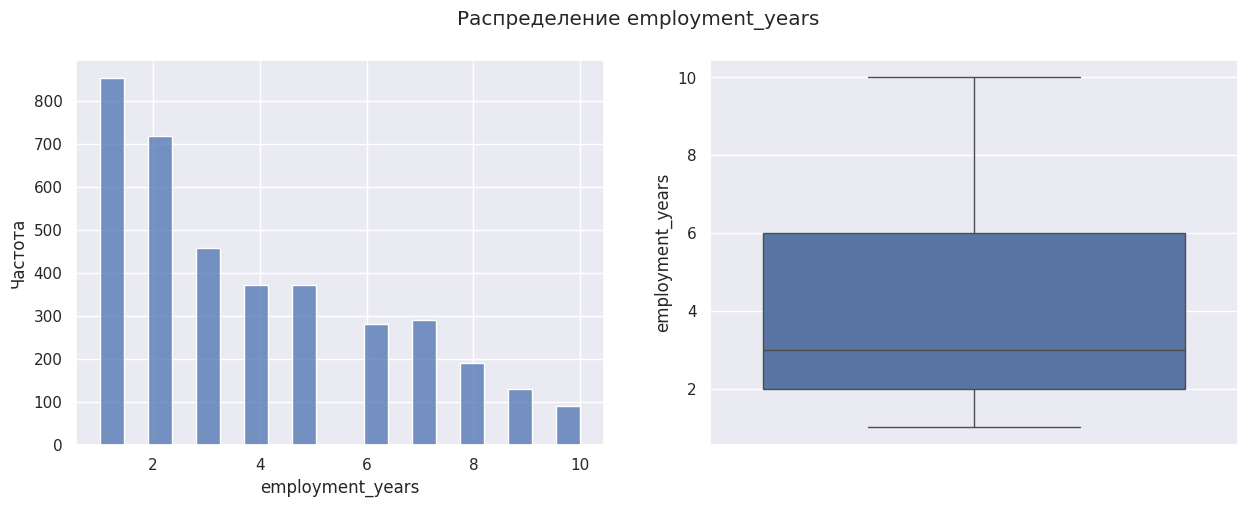

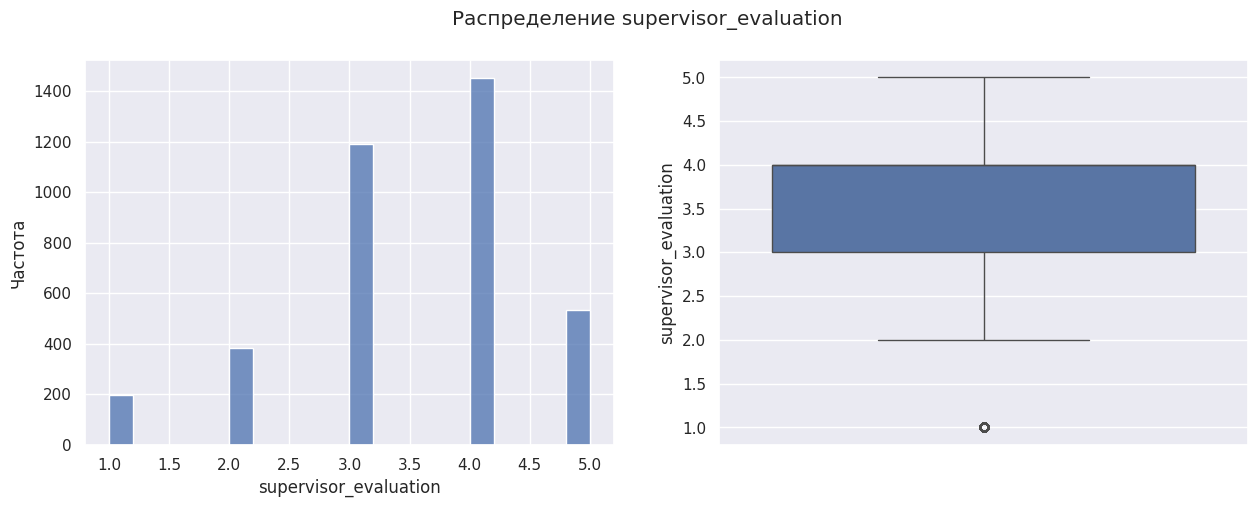

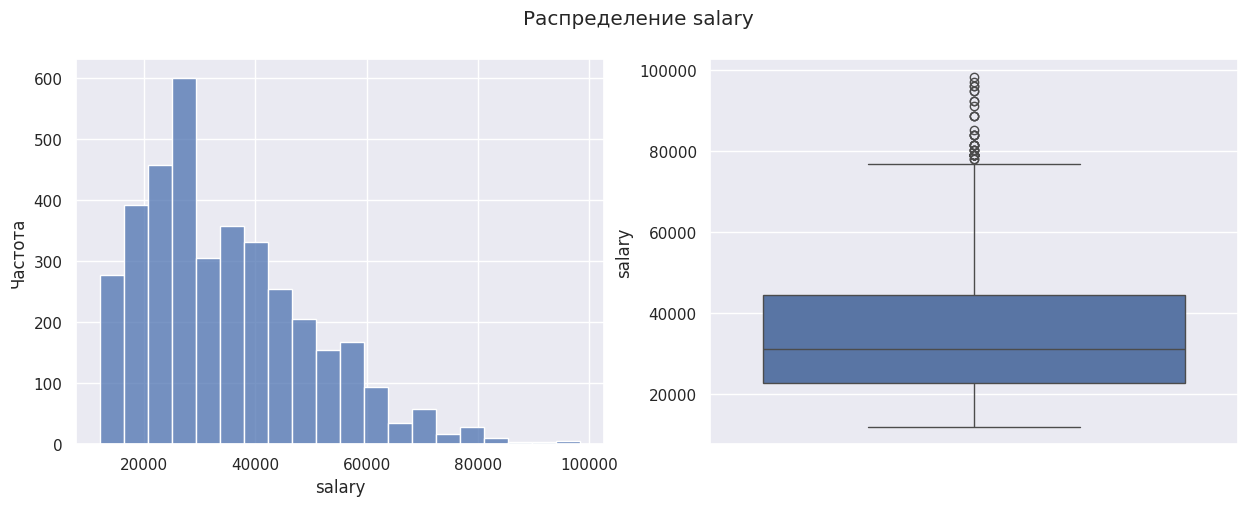

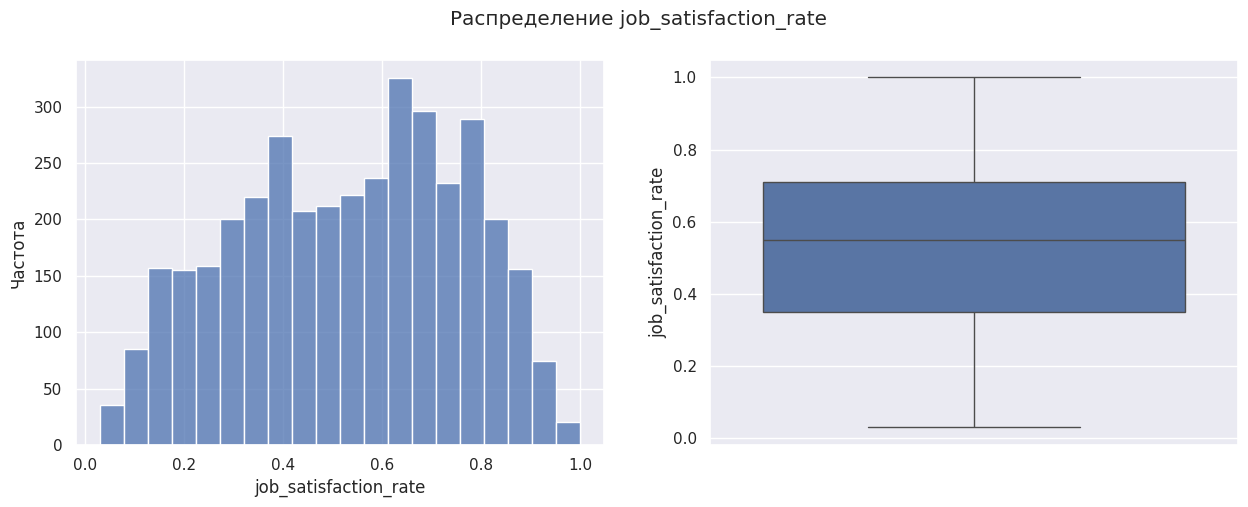

In [15]:
# исследование количественных признаков
for name in train_job.select_dtypes(include=['int64', 'float64']).columns.tolist()[1:]:
    viz_num_variable(train_job, name)
    train_job[name].describe()

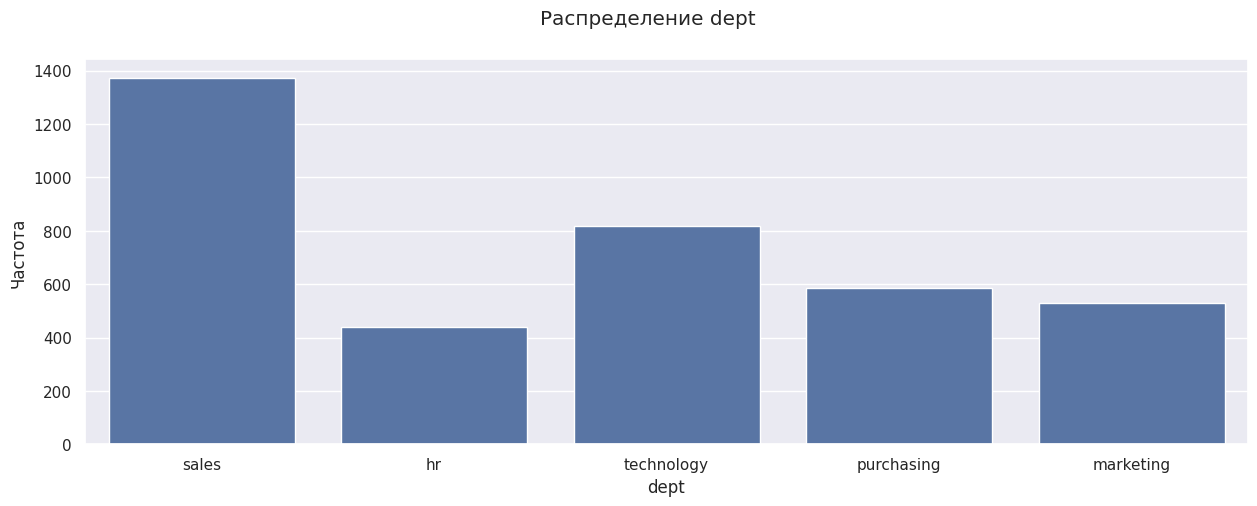

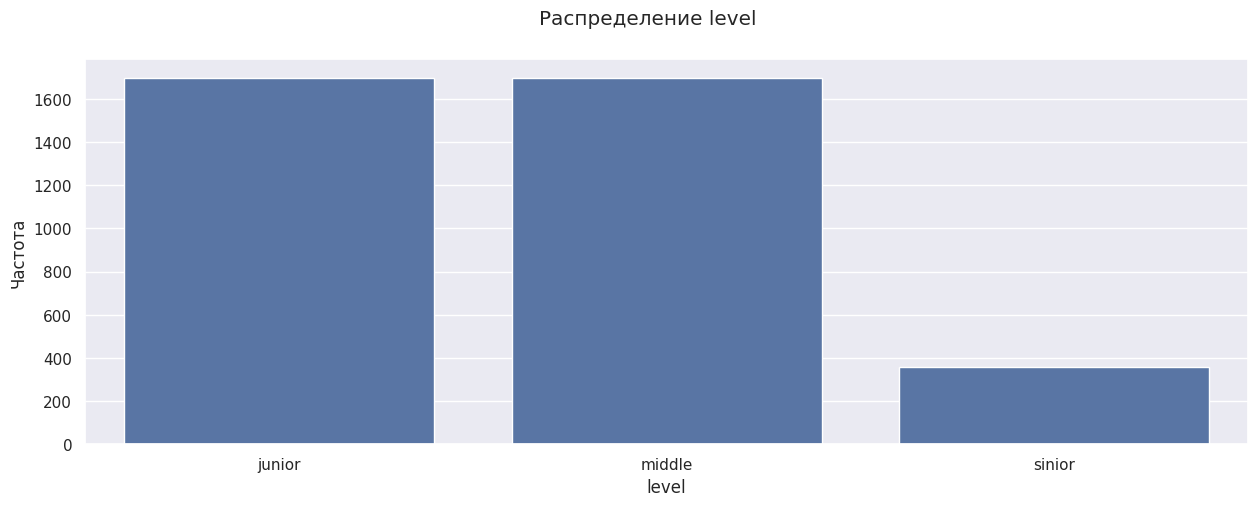

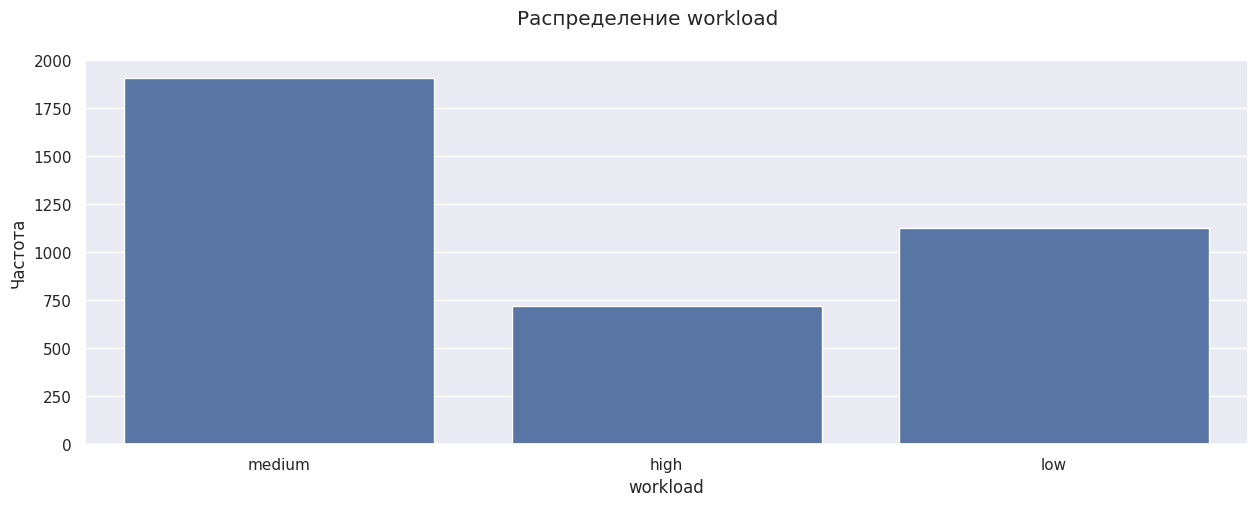

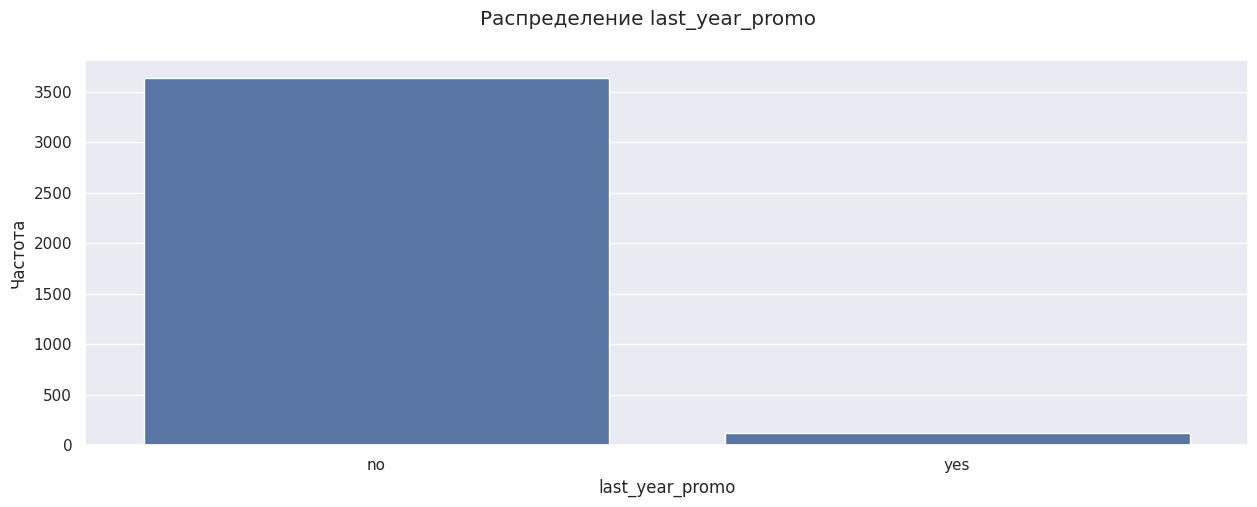

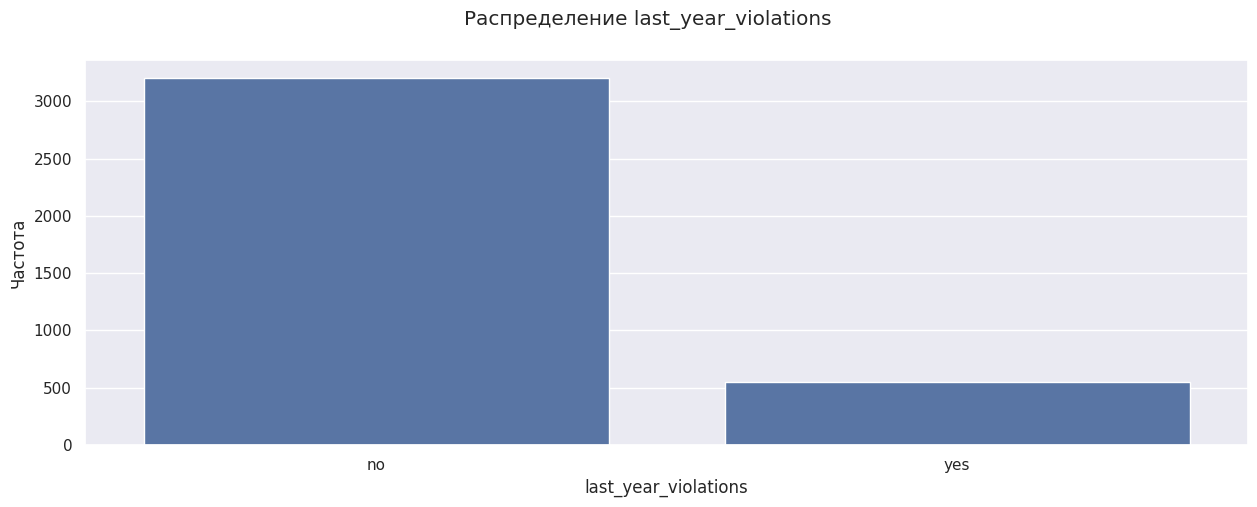

In [16]:
# исследование категориальных признаков
for name in train_job.select_dtypes(include='object').columns.tolist():
    viz_cat_variable(train_job, name)

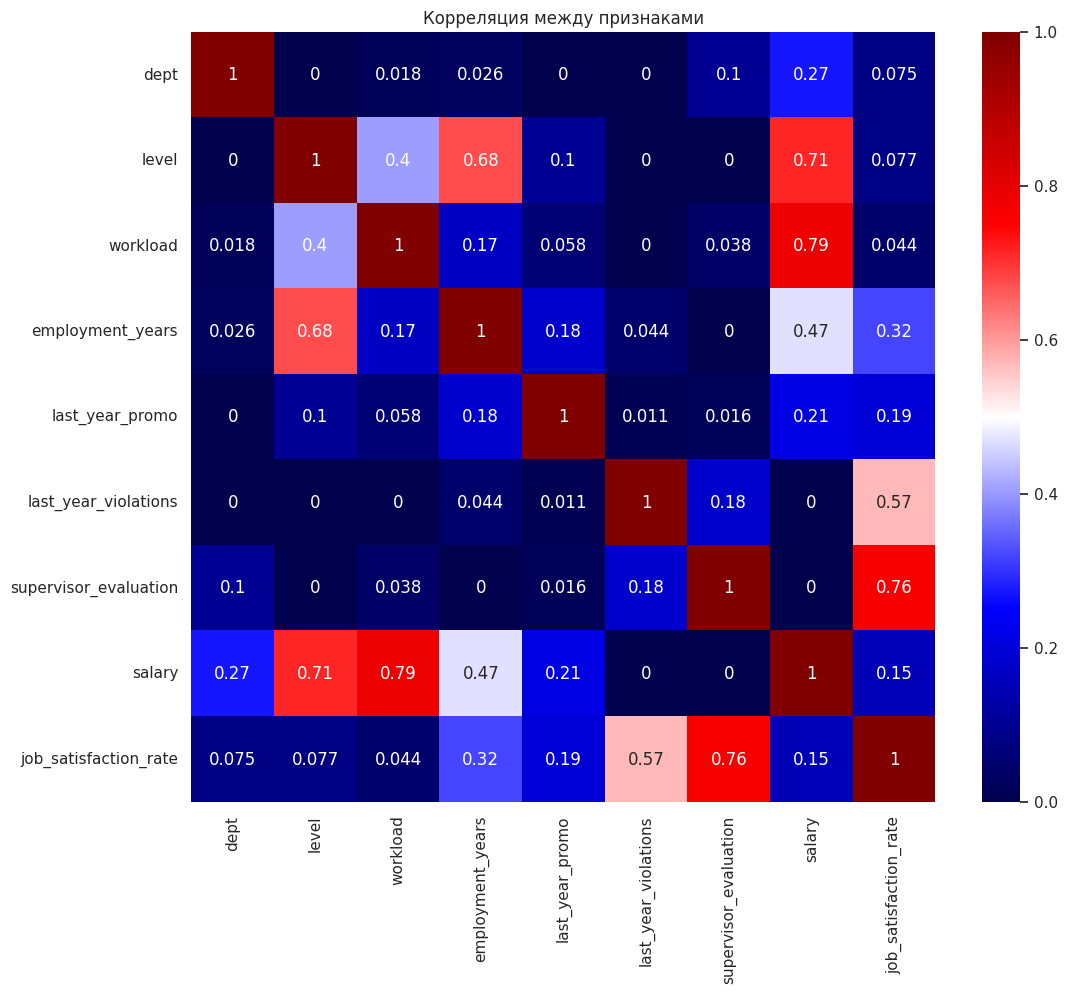

In [17]:
plt.figure(figsize=(12,10))
sns.heatmap(
    train_job[train_job.columns[train_job.columns != 'id']]\
     [list(train_job[train_job.columns[train_job.columns != 'id']].columns)]\
    .phik_matrix(interval_cols = [ 'salary', 'job_satisfaction_rate']),
    annot=True,
    cmap='seismic'
    )
plt.title('Корреляция между признаками')
plt.show()

#### test_features

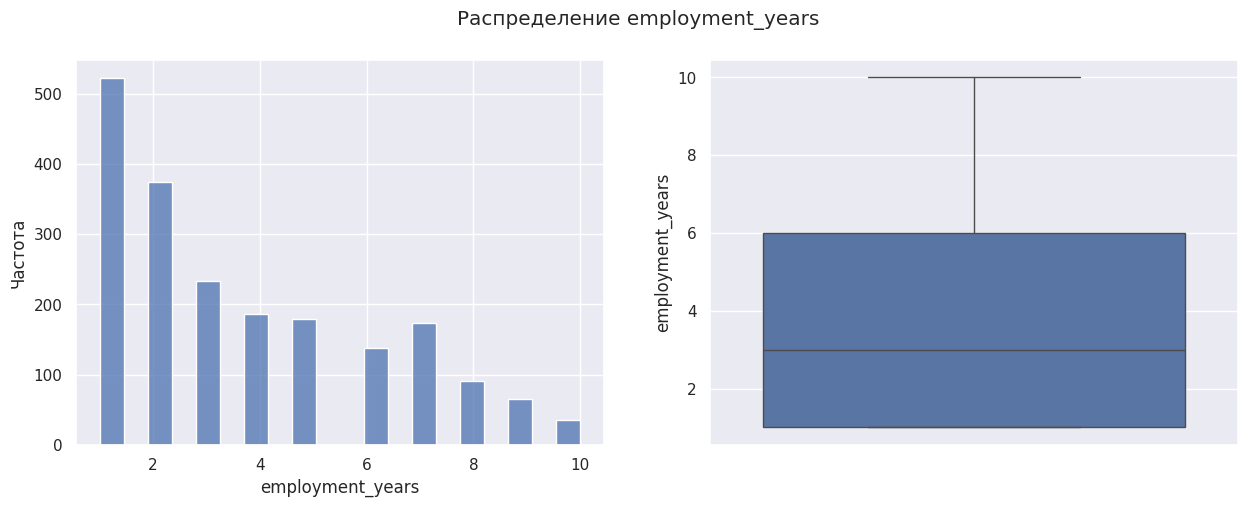

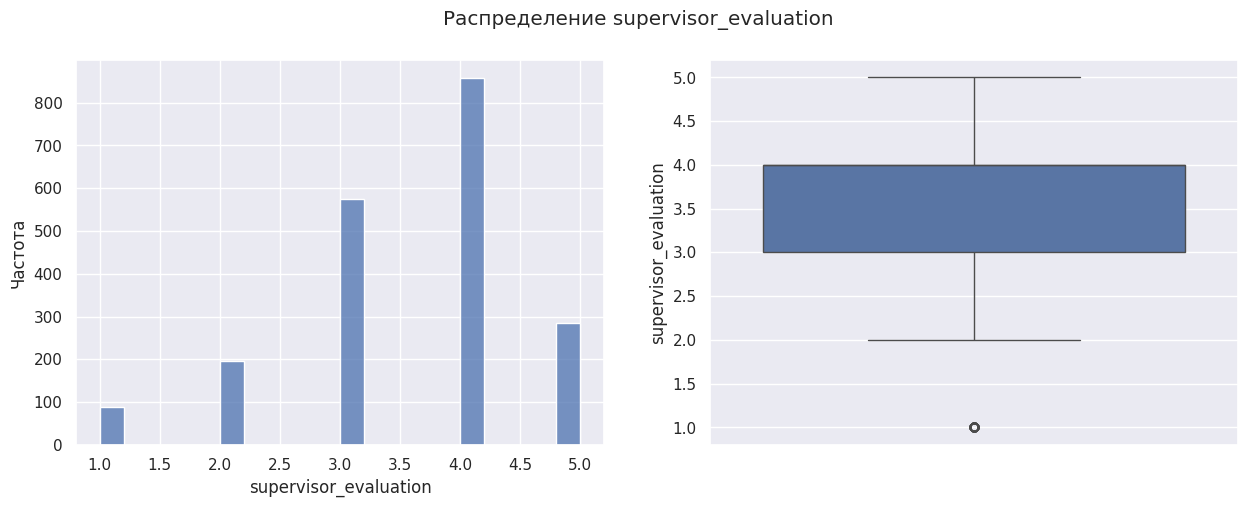

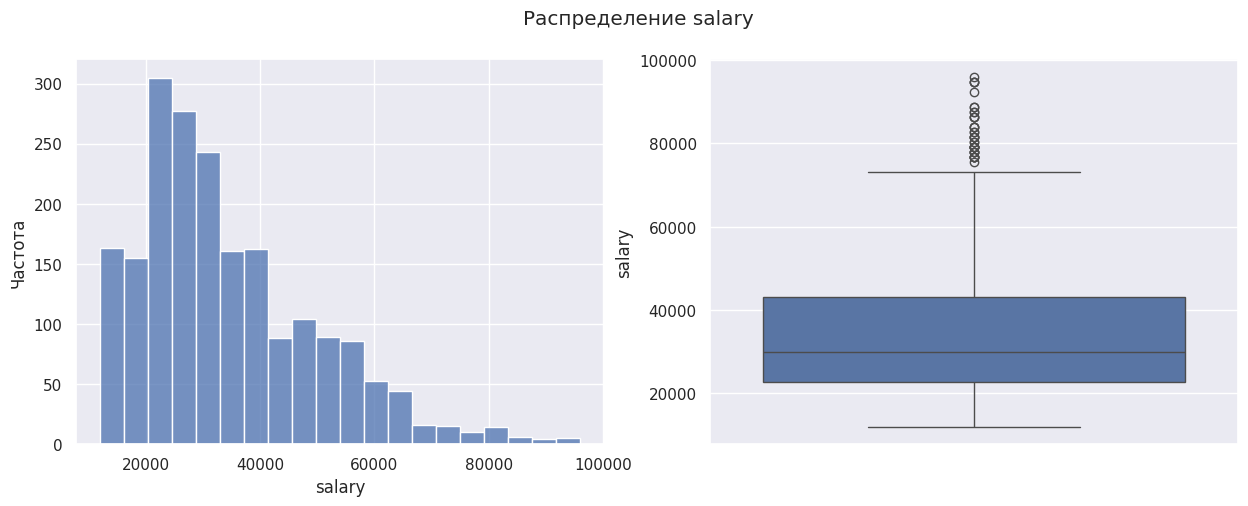

In [18]:
# исследование количественных признаков
for name in test_features.select_dtypes(include=['int64', 'float64']).columns.tolist()[1:]:
    viz_num_variable(test_features, name)
    test_features[name].describe()

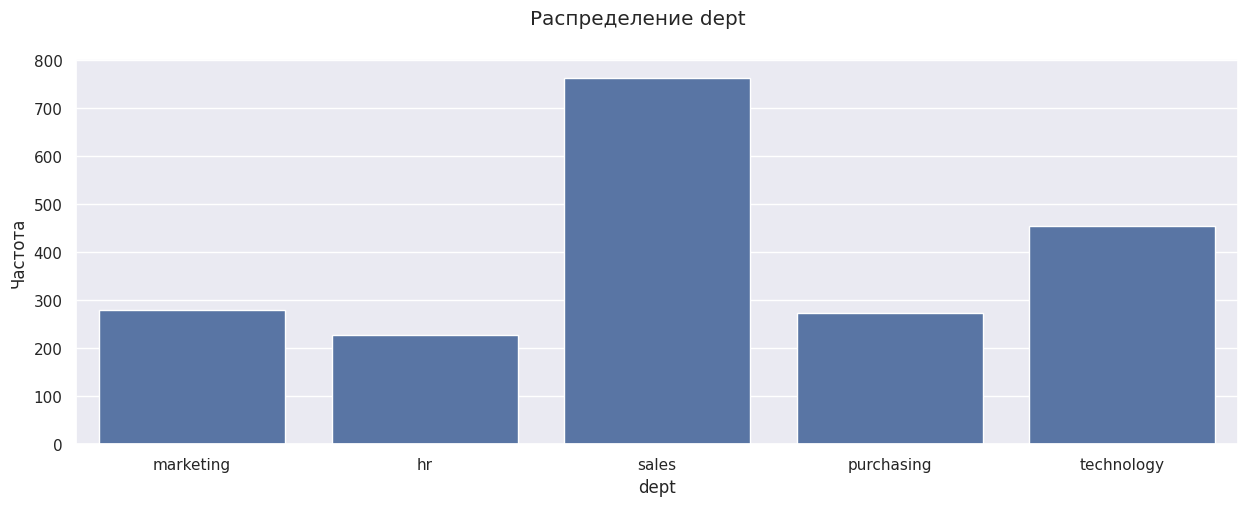

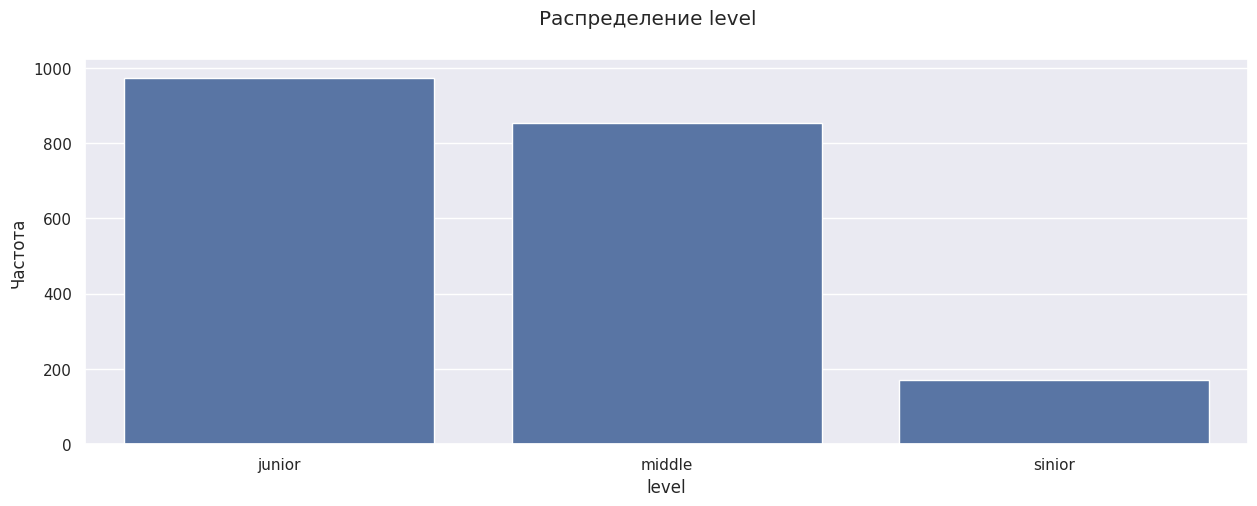

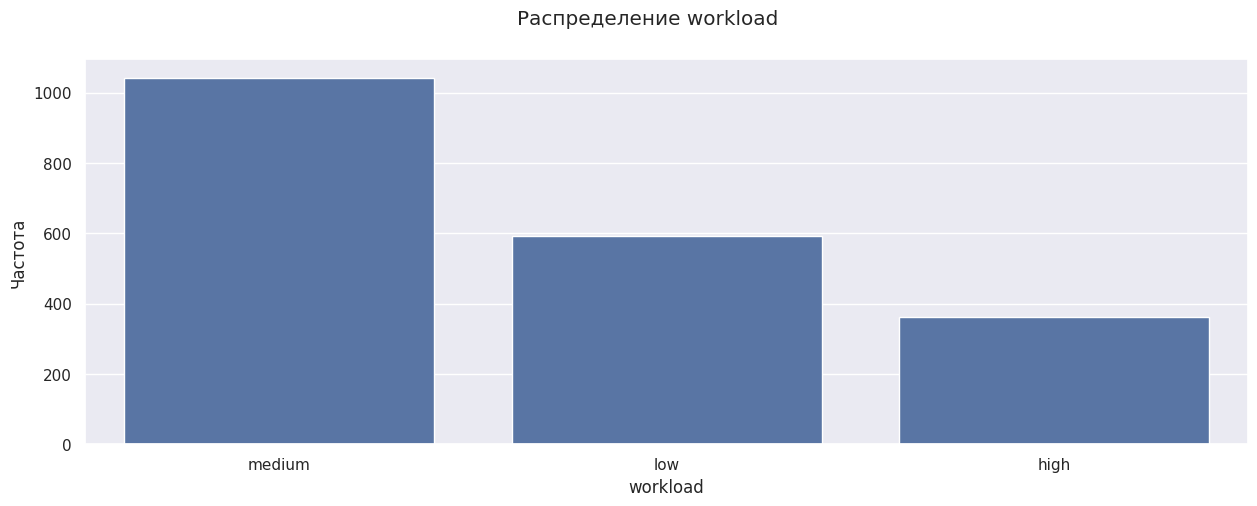

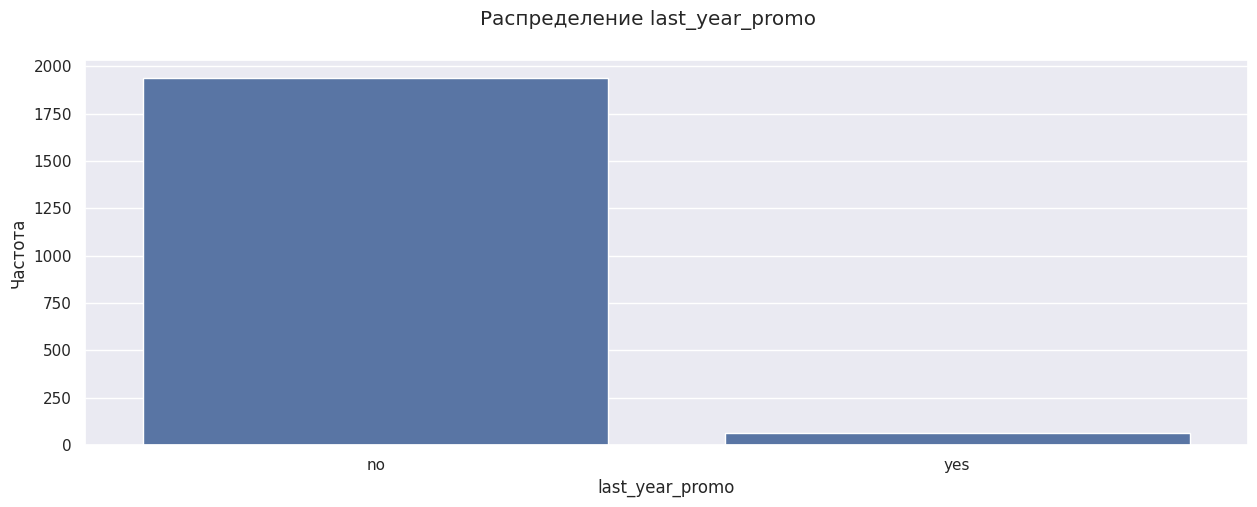

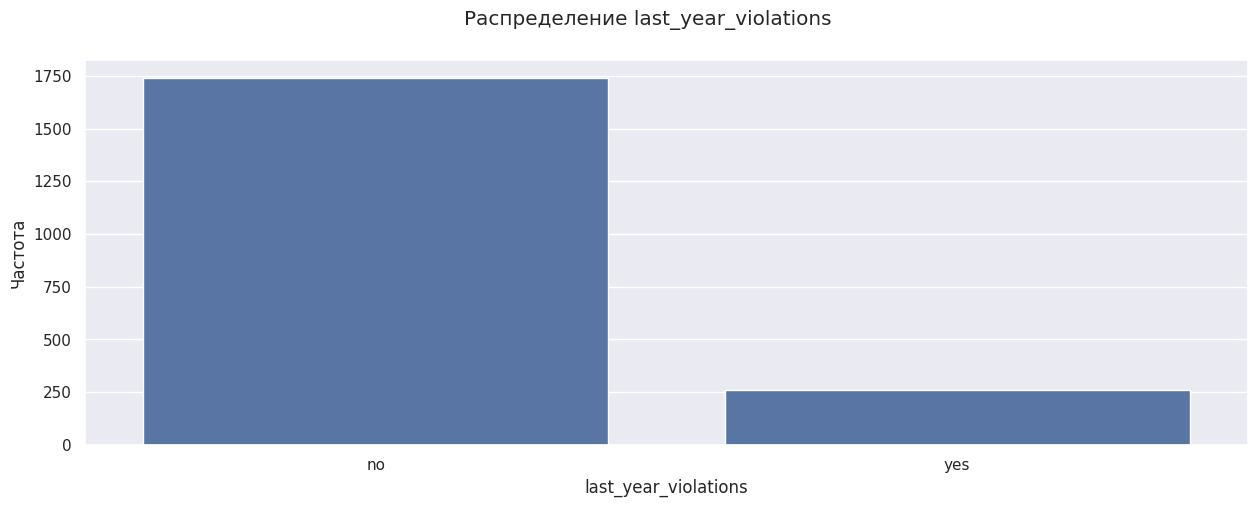

In [19]:
# исследование категориальных признаков
for name in test_features.select_dtypes(include='object').columns.tolist():
    viz_cat_variable(test_features, name)

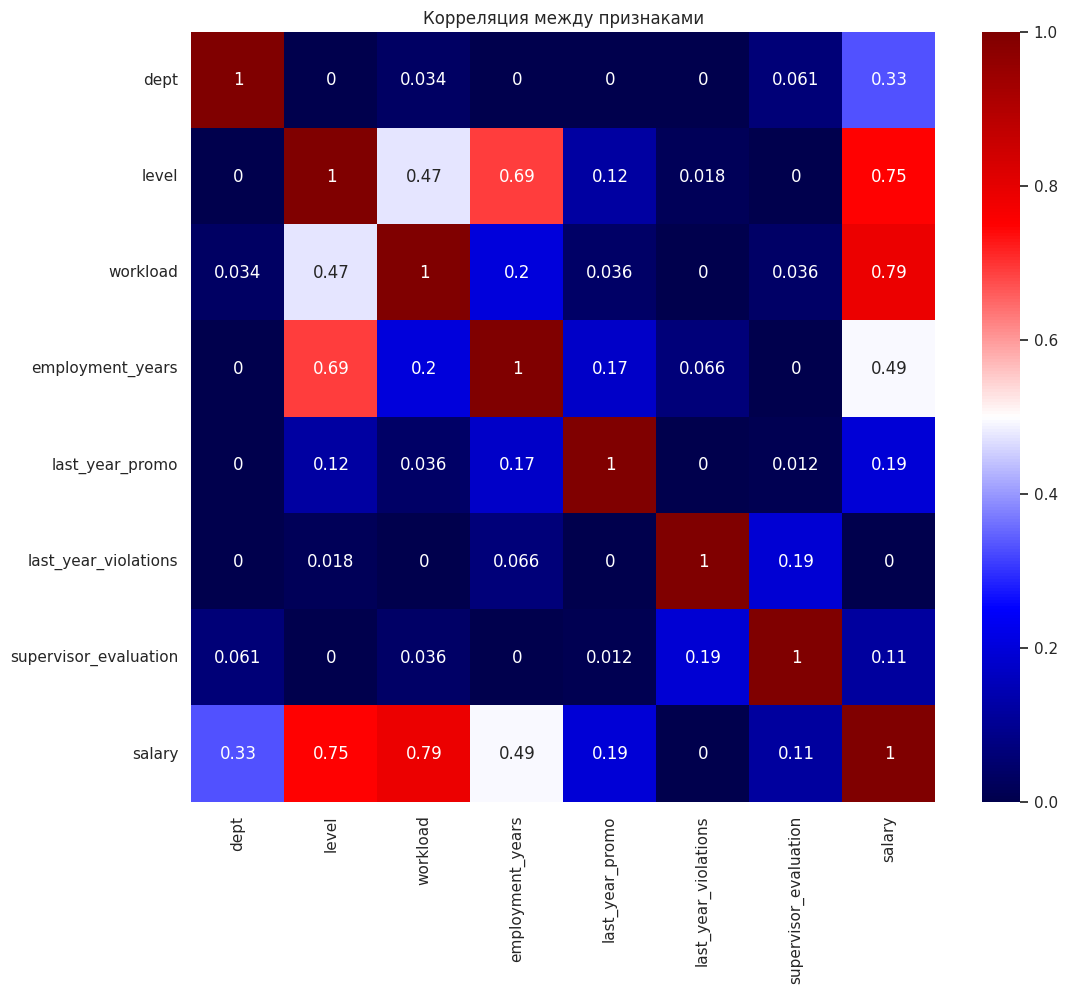

In [20]:
plt.figure(figsize=(12,10))
sns.heatmap(
    test_features[test_features.columns[test_features.columns != 'id']]\
     [list(test_features[test_features.columns[test_features.columns != 'id']].columns)]\
    .phik_matrix(interval_cols = [ 'salary', 'job_satisfaction_rate']),
    annot=True,
    cmap='seismic'
    )
plt.title('Корреляция между признаками')
plt.show()

#### test_target

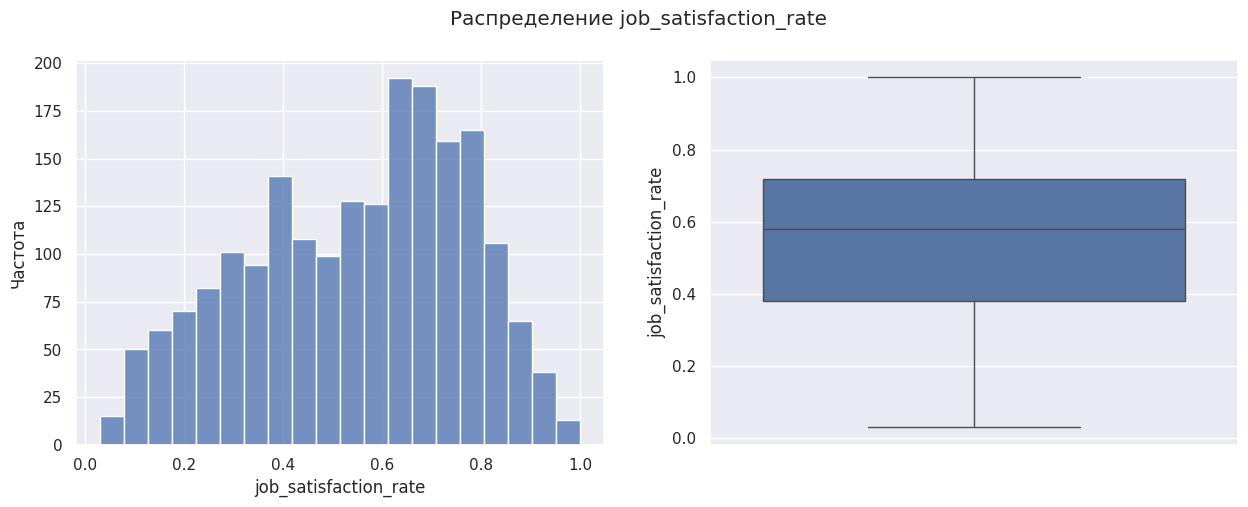

count    2000.00000
mean        0.54878
std         0.22011
min         0.03000
25%         0.38000
50%         0.58000
75%         0.72000
max         1.00000
Name: job_satisfaction_rate, dtype: float64

In [21]:
# исследование количественных признаков
viz_num_variable(test_target, 'job_satisfaction_rate')
test_target['job_satisfaction_rate'].describe()

#### Выводы:
- Исследовательский анализ данных показал наличие незначительного количества выбросов;
- Количественный данные распределены нормально;
- В категориальных данных выявлено неравномерное распределение.

### Подготовка данных

#### Объединение тестовой выборки и целевого признака

In [22]:
test_features = test_features.merge(test_target, on='id')
test_features.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,485046,marketing,junior,medium,2,no,no,5,28800,0.79
1,686555,hr,junior,medium,1,no,no,4,30000,0.72
2,467458,sales,middle,low,5,no,no,4,19200,0.64
3,418655,sales,middle,low,6,no,no,4,19200,0.60
4,789145,hr,middle,medium,5,no,no,5,40800,0.75


In [23]:
X_train = train_job.drop(['job_satisfaction_rate', 'id'], axis=1)
y_train = train_job['job_satisfaction_rate']
X_test = test_features.drop(['job_satisfaction_rate', 'id'], axis=1)
y_test = test_features['job_satisfaction_rate']

ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns = ['level', 'workload']
num_columns = [
    'employment_years',
    'supervisor_evaluation',
    'salary'
              ]

# создаём пайплайн для подготовки признаков
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False))
    ]
)

ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'],
                    ['low', 'medium', 'high']
                ],
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),

    ]
)

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns)
    ],
    remainder='passthrough'
)

### Обучение модели

#### Выбор лучшей модели

In [24]:
# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LinearRegression())
])

#Параметры для передачи GridSearchCV для поиска оптимальной модели
param_grid = [

    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },

    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(1, 15),
        'models__max_features': range(1, 15),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

def smape(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

smape_scorer = make_scorer(score_func=smape, greater_is_better=False)

grid_search = GridSearchCV(
    pipe_final,
    param_grid,
    n_jobs=-1,
    cv=5,
    scoring=smape_scorer
)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         Pipeline(steps=[('simpleImputer_ohe',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         ['dept',
                                                                          'last_year_promo',
                                                                          'last_year_violations']),
                                                                        ('ord',
                                                                         Pipeline(steps=[...
             param_grid=[{'models': [LinearRegression()],
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(),
                                                'passthrough']},
                         {'models': [DecisionTreeRegressor(max_depth=12,
                                                           max_features=8,
                                                           random_state=42)],
                          'models__max_depth': range(1, 15),
                          'models__max_features': range(1, 15),
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(),
                                                'passthrough']}],
             scoring=make_scorer(smape, greater_is_better=False))

#### Проверка качества

In [25]:
best_model = grid_search.best_estimator_
print('Лучшая модель и её параметры:\n\n', grid_search.best_params_)
print ('Метрика лучшей модели на тренировочной выборке:', grid_search.best_score_*(-1))

Лучшая модель и её параметры:

 {'models': DecisionTreeRegressor(max_depth=12, max_features=8, random_state=42), 'models__max_depth': 12, 'models__max_features': 8, 'preprocessor__num': MinMaxScaler()}
Метрика лучшей модели на тренировочной выборке: 15.596802397483746


In [26]:
print(f'Метрика SMAPE лучшей модели на тестовой выборке: {round(smape(y_test, best_model.predict(X_test)),3)}')

Метрика SMAPE лучшей модели на тестовой выборке: 14.785


### Выводы 1 задачи:
- Проведена обработка и исследованы исходные данные и признаки;
- Отобрана лучшая модель на основе метрики - DecisionTreeRegressor(max_depth=12, max_features=8, random_state=42);
- Метрика `SMAPE` лучшей модели - 14.785.

## Предсказание увольнения сотрудника из компании

### Загрузка данных

In [27]:
# чтение данных
try:
    train_quit = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Yandex/Project 2/train_quit.csv')
    test_target_quit = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Yandex/Project 2/test_target_quit.csv')
except:
    train_quit = pd.read_csv('/datasets/train_quit.csv')
    test_target_quit = pd.read_csv('/datasets/test_target_quit.csv')

#### train_quit

In [28]:
# изучение тренировочной выборки
train_quit.info()
train_quit.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


В столбцах отсутствуют пропуски

Типы данных соответствуют

#### test_target_quit

In [29]:
# изучение целевого признака тестовой выборки
test_target_quit.info()
test_target_quit.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


В данных отсутствуют пропуски

Типы данных соответствуют

#### Выводы:
- Данные соответствуют описанию;
- Пропуски не обнаружены;
- Типы данных во всех таблицах соотвутствуют.

### Предобработка данных

#### Объединение тестовой выборки и целевого признака

In [30]:
test_features = test_features.merge(test_target_quit, on='id')
test_features.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,quit
0,485046,marketing,junior,medium,2,no,no,5,28800,0.79,no
1,686555,hr,junior,medium,1,no,no,4,30000,0.72,no
2,467458,sales,middle,low,5,no,no,4,19200,0.64,no
3,418655,sales,middle,low,6,no,no,4,19200,0.60,no
4,789145,hr,middle,medium,5,no,no,5,40800,0.75,no


### Исследовательский анализ данных

#### Анализ данных

##### train_quit

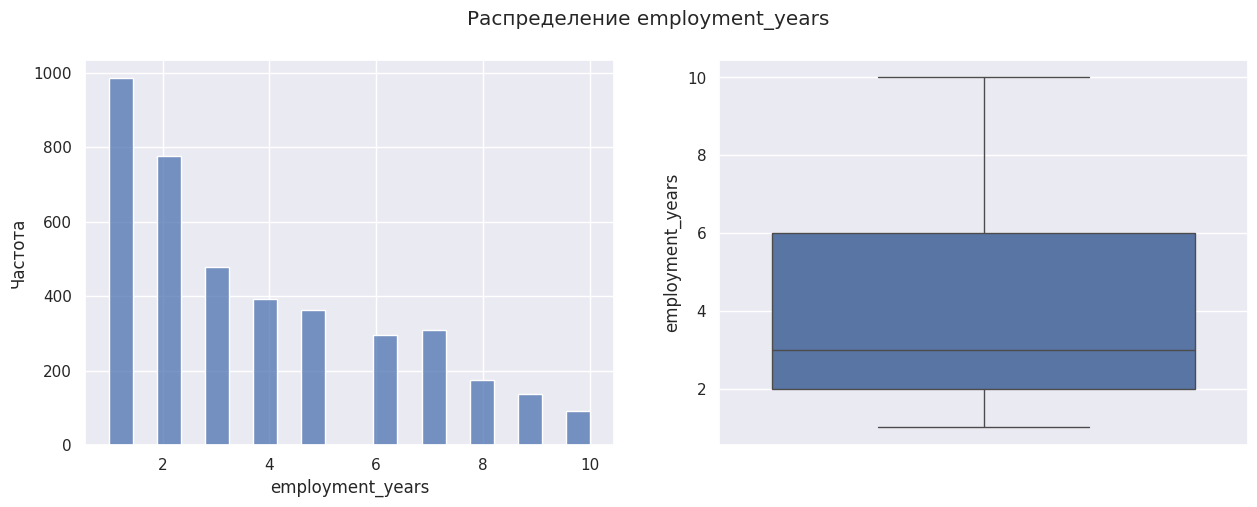

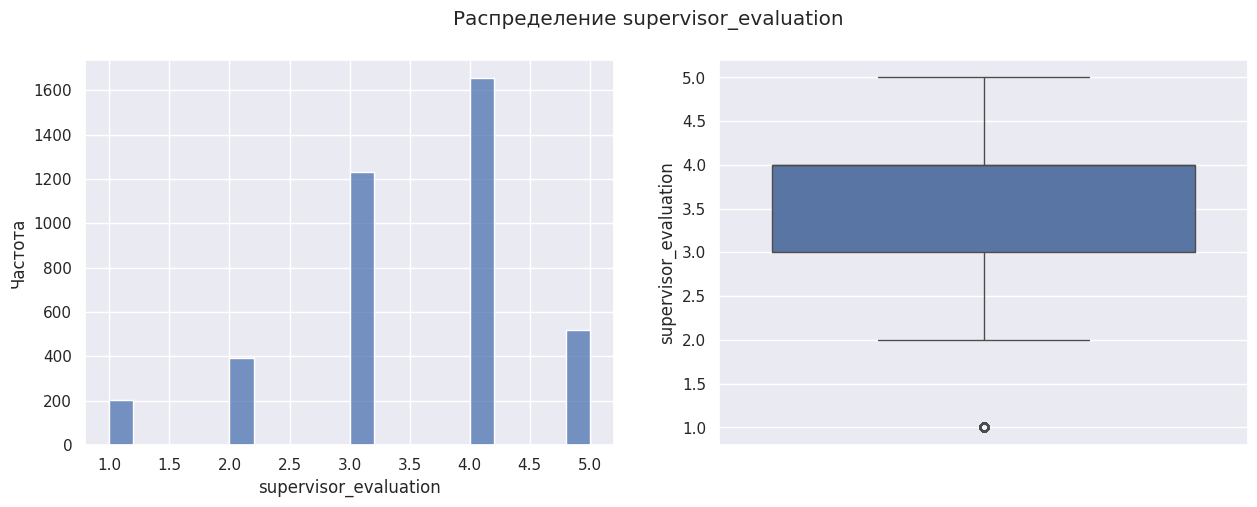

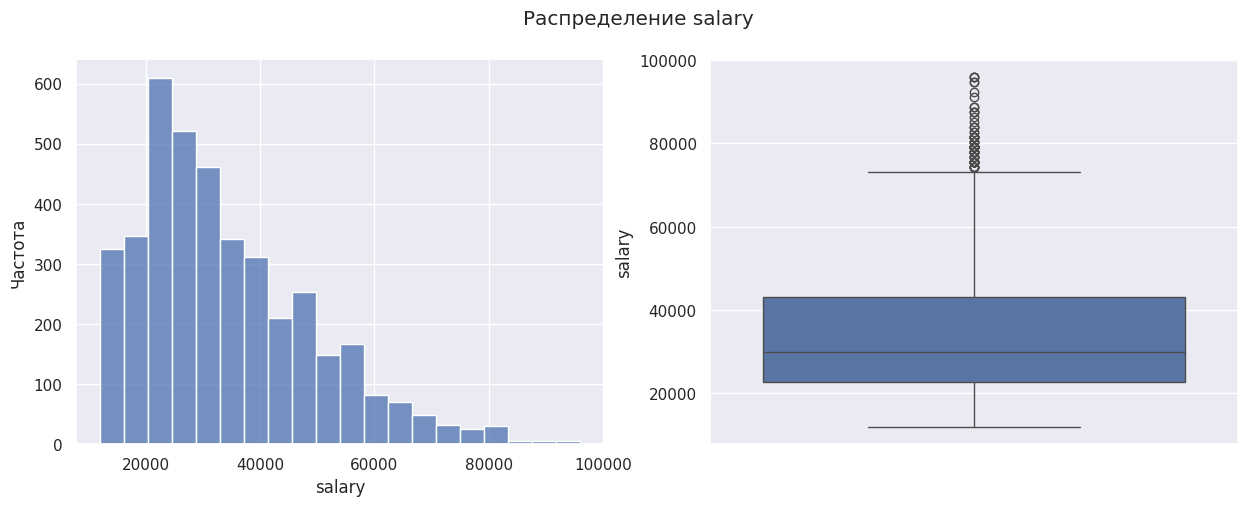

In [31]:
# исследование количественных признаков
for name in train_quit.select_dtypes(include=['int64', 'float64']).columns.tolist()[1:]:
    viz_num_variable(train_quit, name)
    train_quit[name].describe()

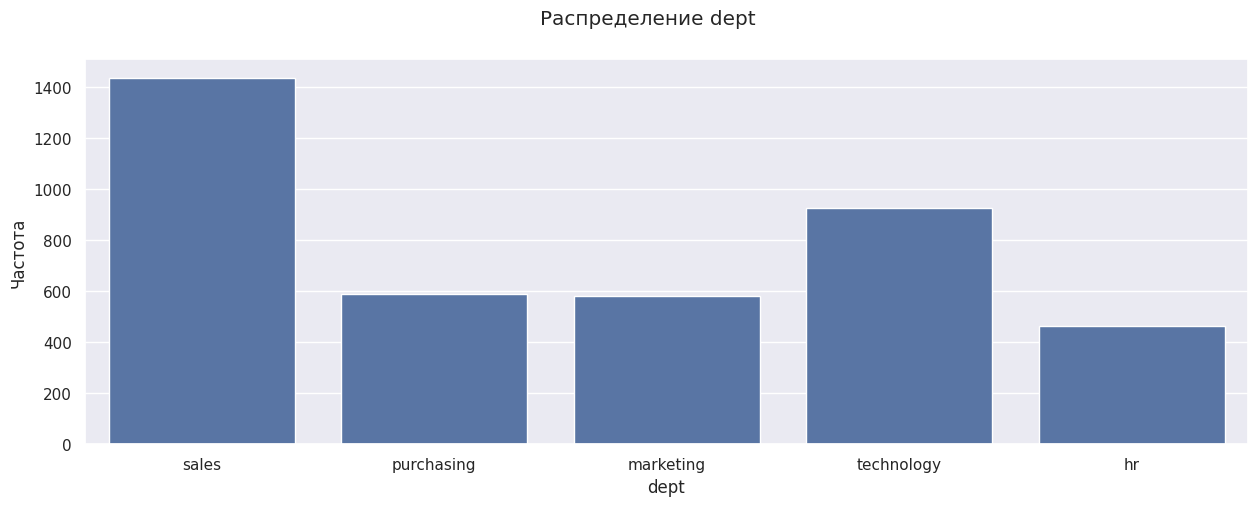

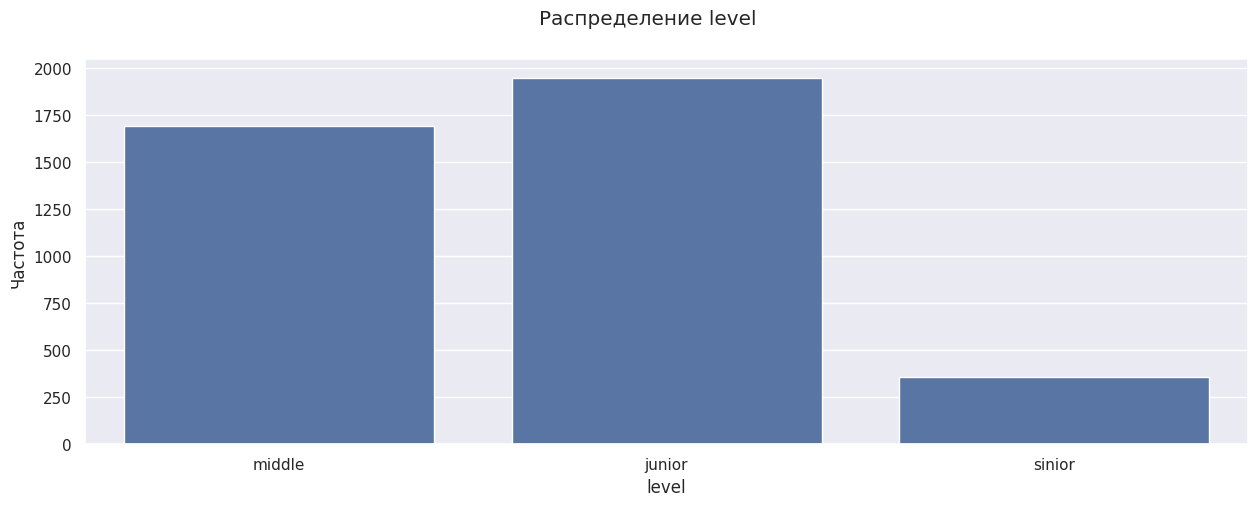

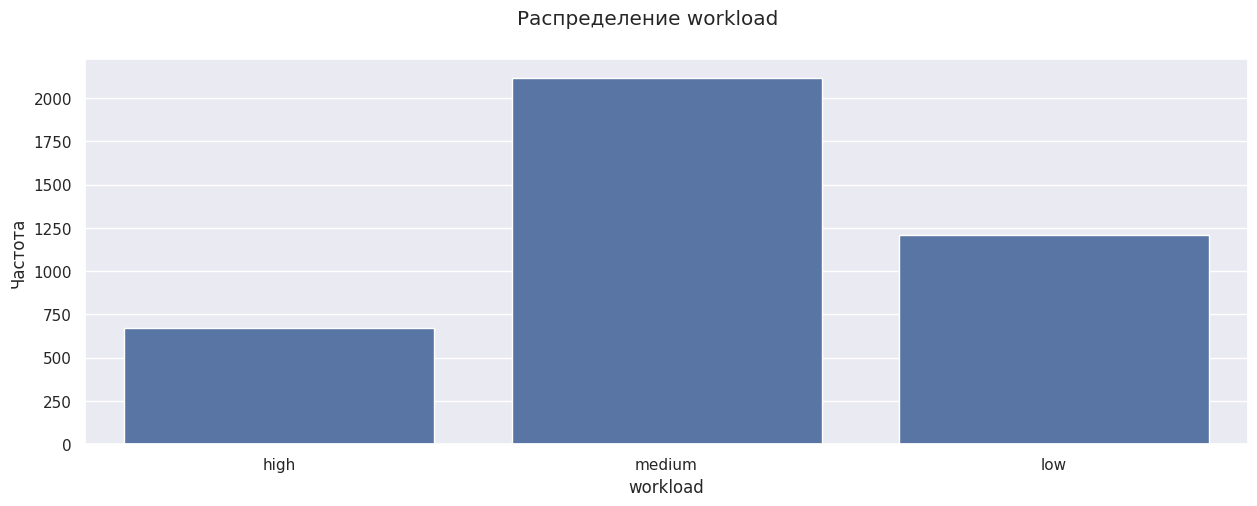

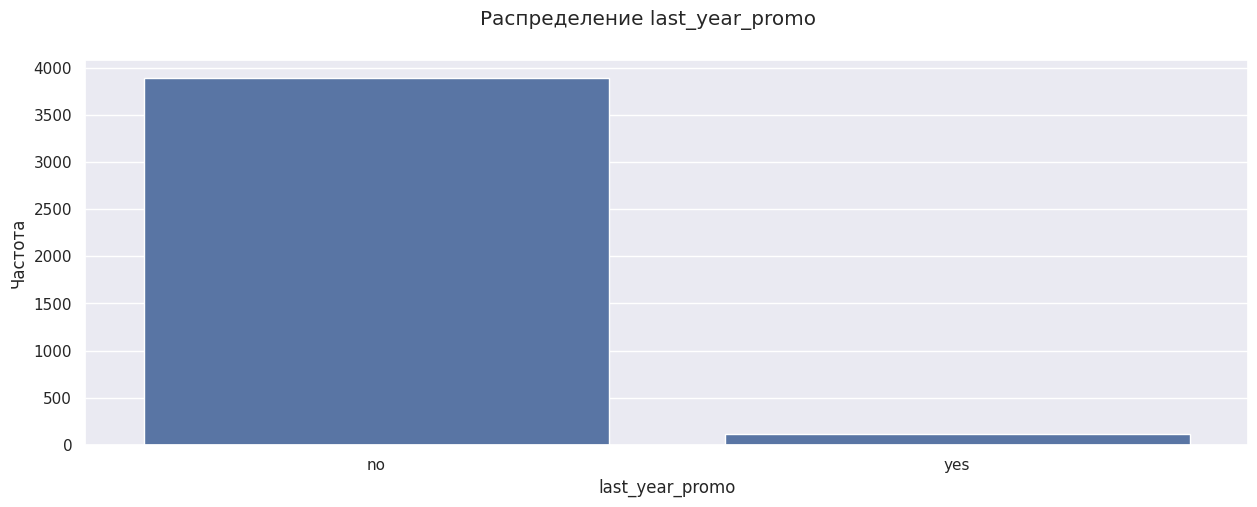

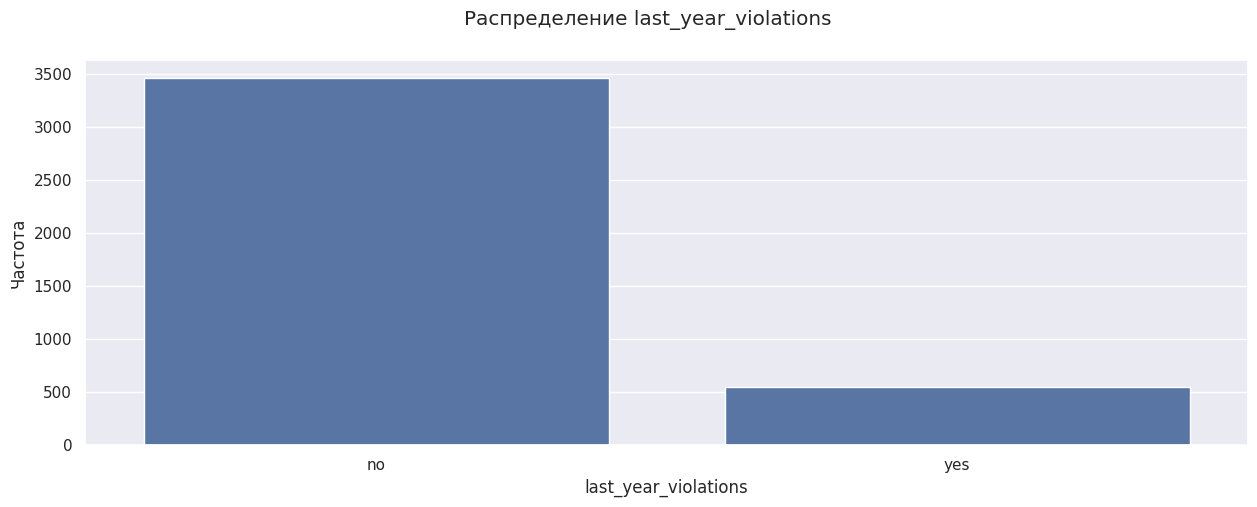

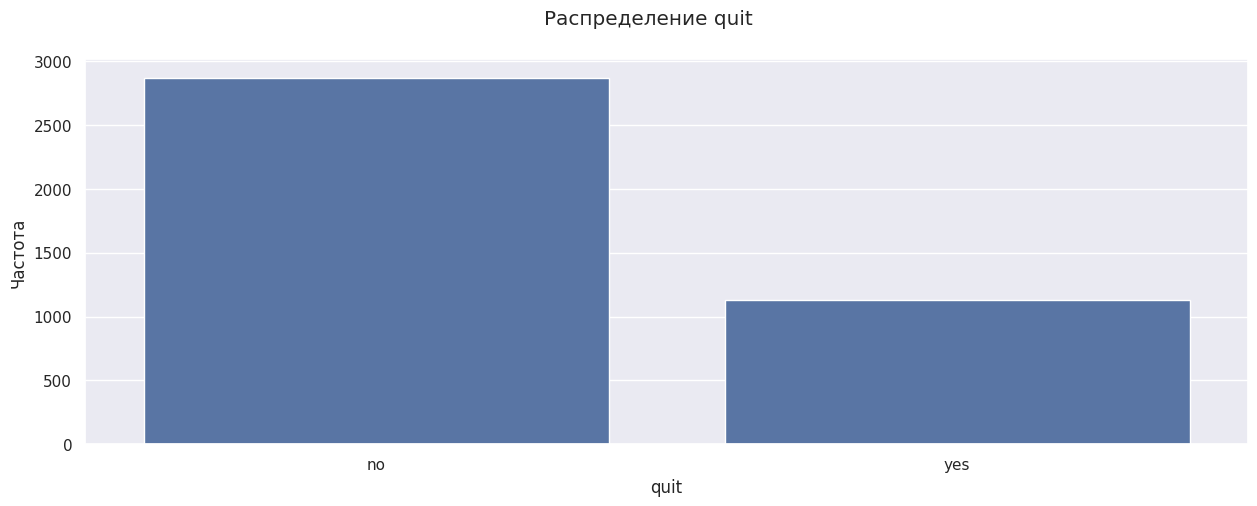

In [32]:
# исследование количественных признаков
for name in train_quit.select_dtypes(include='object').columns.tolist():
    viz_cat_variable(train_quit, name)
    train_quit[name].describe()

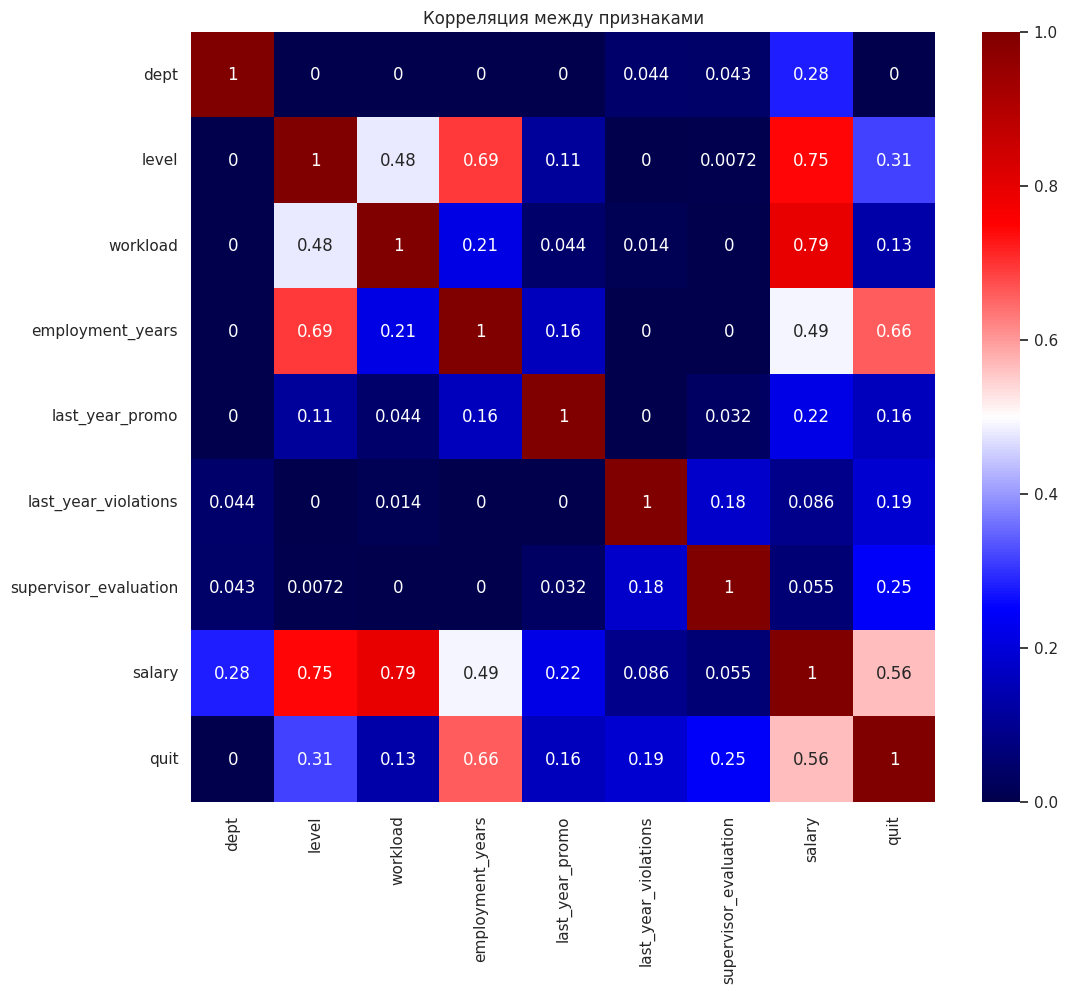

In [33]:
plt.figure(figsize=(12,10))
sns.heatmap(
    train_quit[train_quit.columns[train_quit.columns != 'id']]\
     [list(train_quit[train_quit.columns[train_quit.columns != 'id']].columns)]\
    .phik_matrix(interval_cols=['employment_years', 'supervisor_evaluation', 'salary']),
    annot=True,
    cmap='seismic'
    )
plt.title('Корреляция между признаками')
plt.show()

##### test_features

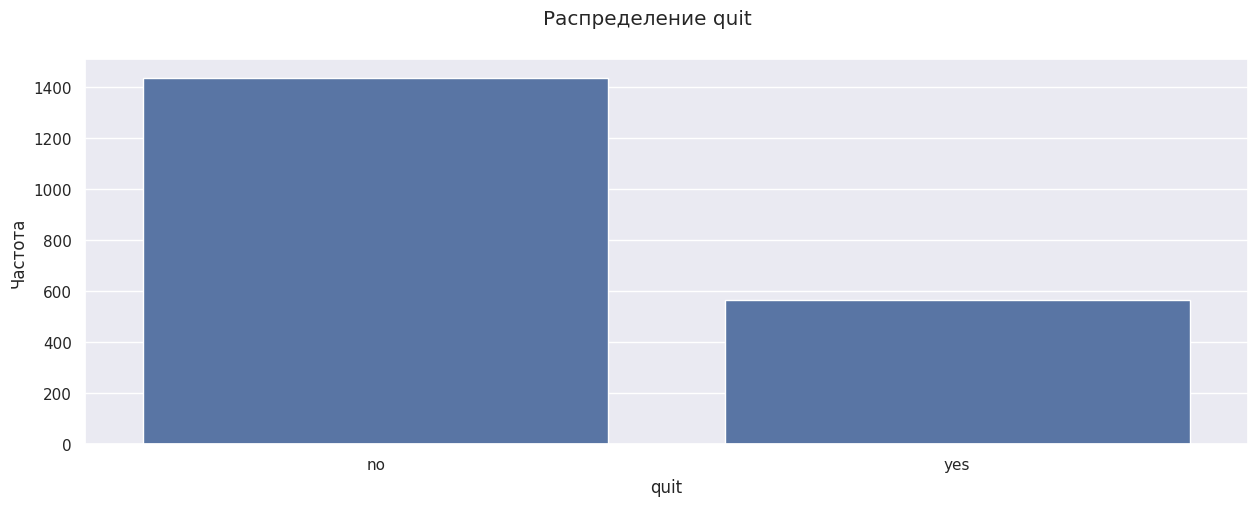

In [34]:
# исследование целевого признака
viz_cat_variable(test_features, 'quit')

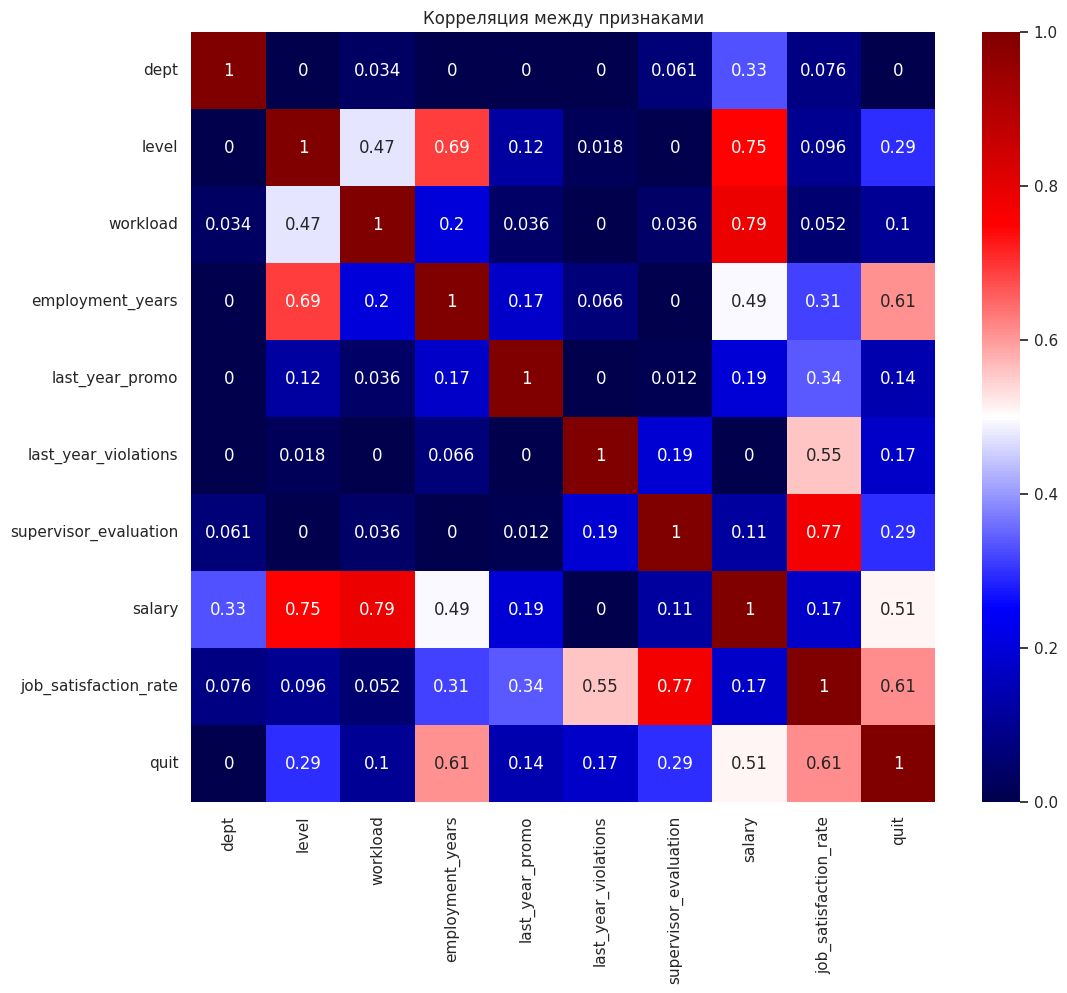

In [35]:
plt.figure(figsize=(12,10))
sns.heatmap(
    test_features[test_features.columns[test_features.columns != 'id']]\
     [list(test_features[test_features.columns[test_features.columns != 'id']].columns)]\
    .phik_matrix(interval_cols=['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']),
    annot=True,
    cmap='seismic'
    )
plt.title('Корреляция между признаками')
plt.show()

#### Портрет «уволившегося сотрудника»

In [36]:
train_quit[train_quit['quit'] == 'yes'].describe()

,id,employment_years,supervisor_evaluation,salary
count,1128.000000,1128.000000,1128.000000,1128.000000
mean,544544.457447,1.844858,3.046099,23885.106383
std,258059.498361,1.274920,0.973291,9351.599505
min,100222.000000,1.000000,1.000000,12000.000000
25%,325073.000000,1.000000,3.000000,16800.000000
50%,545003.500000,1.000000,3.000000,22800.000000
75%,756296.000000,2.000000,4.000000,27600.000000
max,999158.000000,10.000000,5.000000,79200.000000


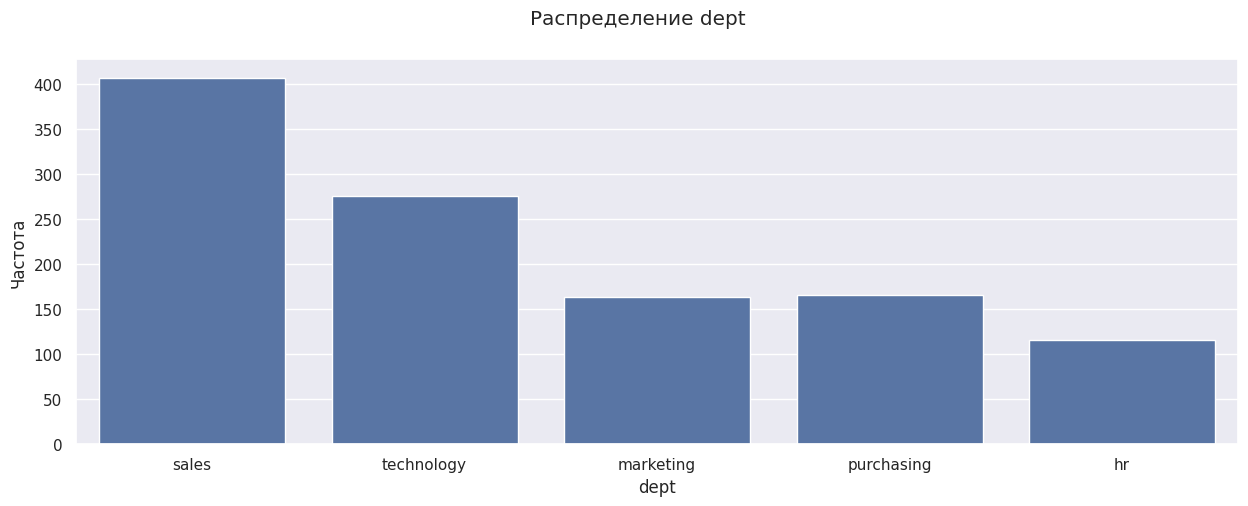

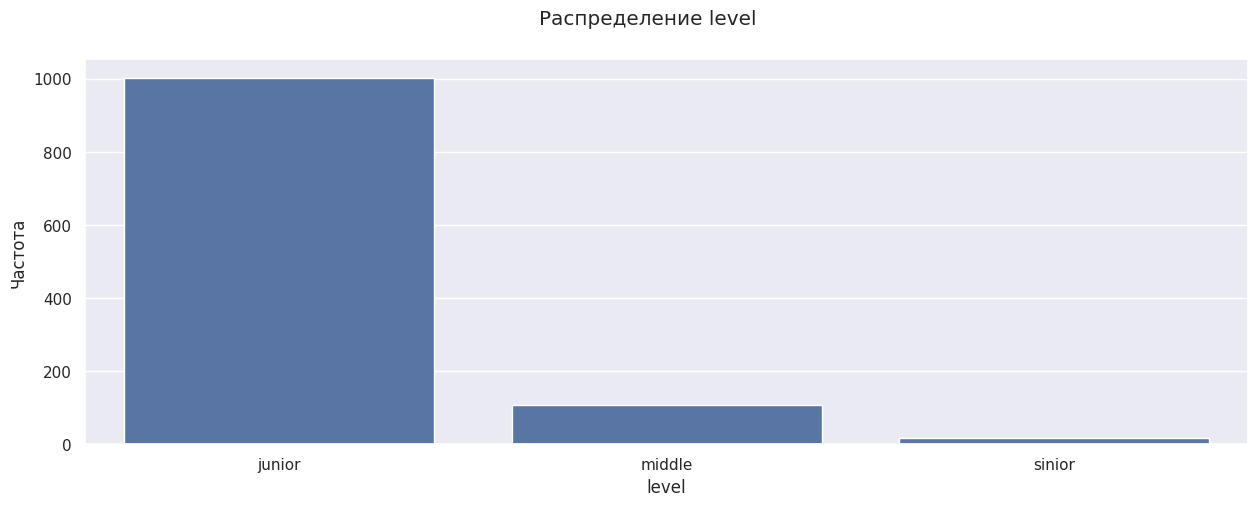

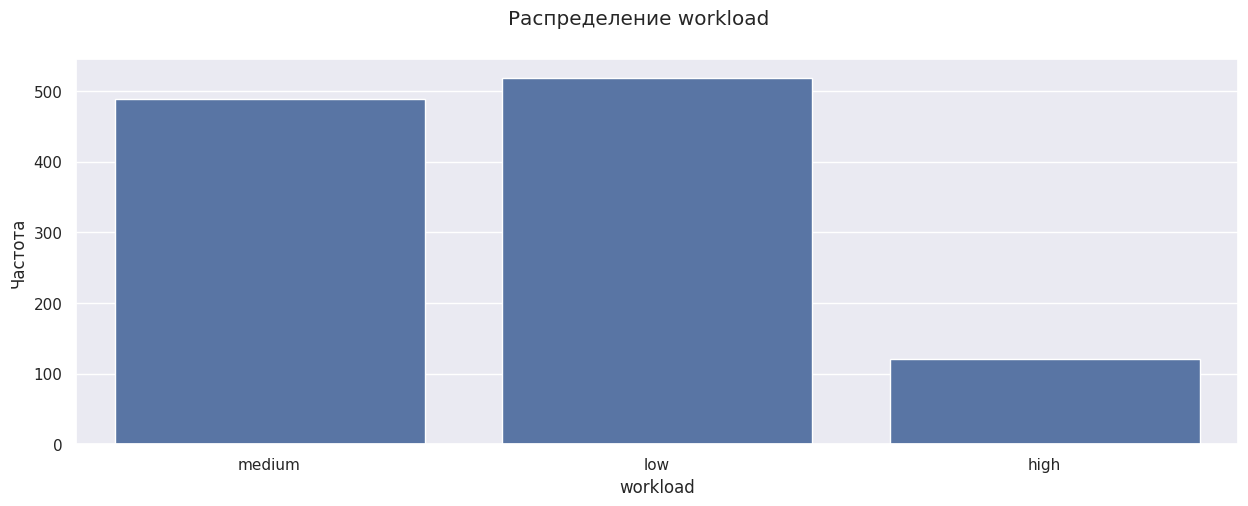

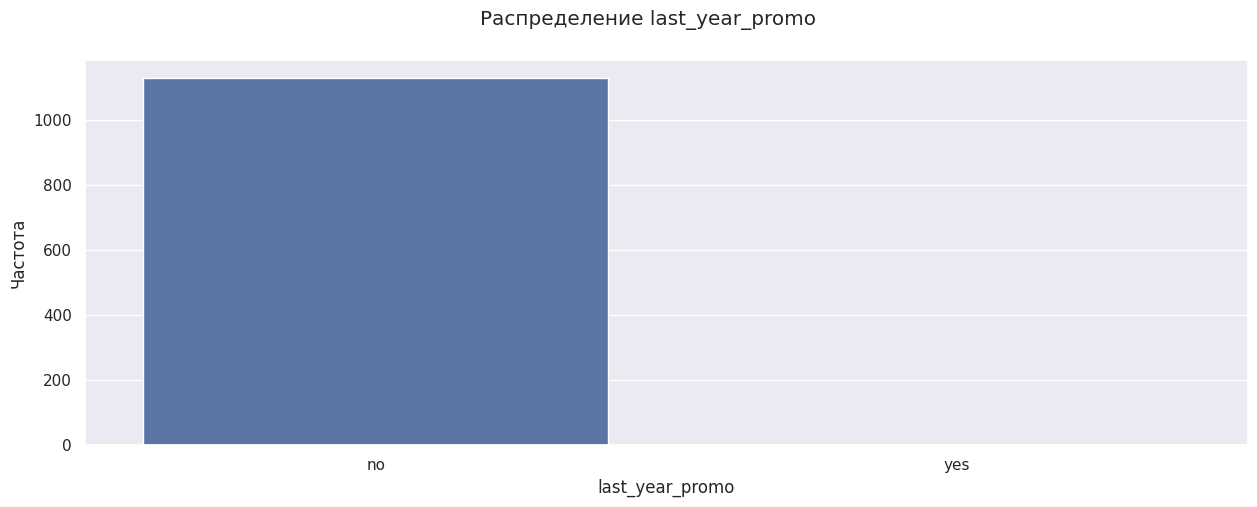

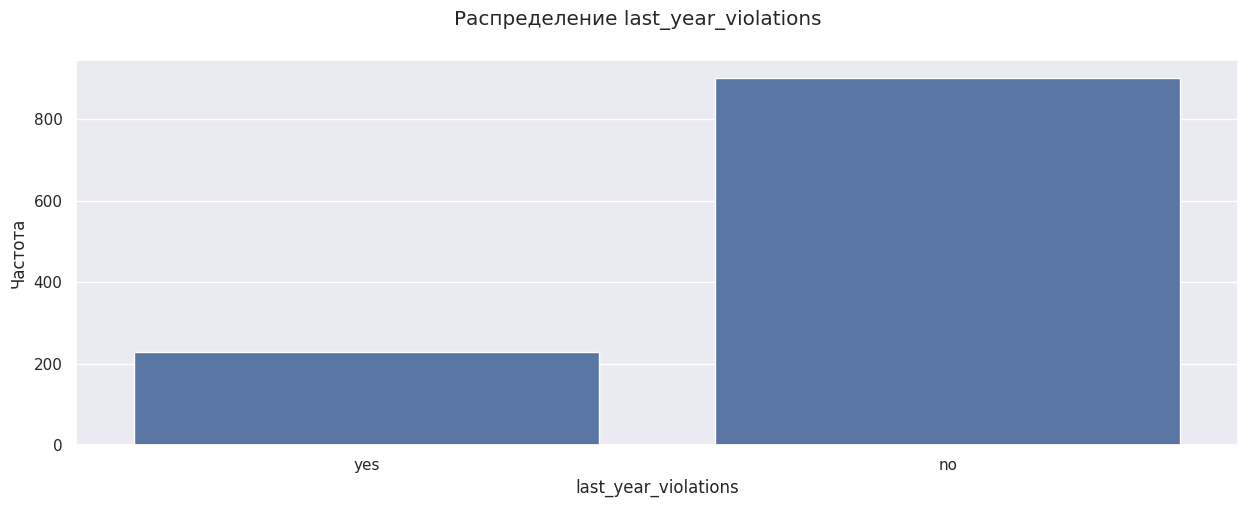

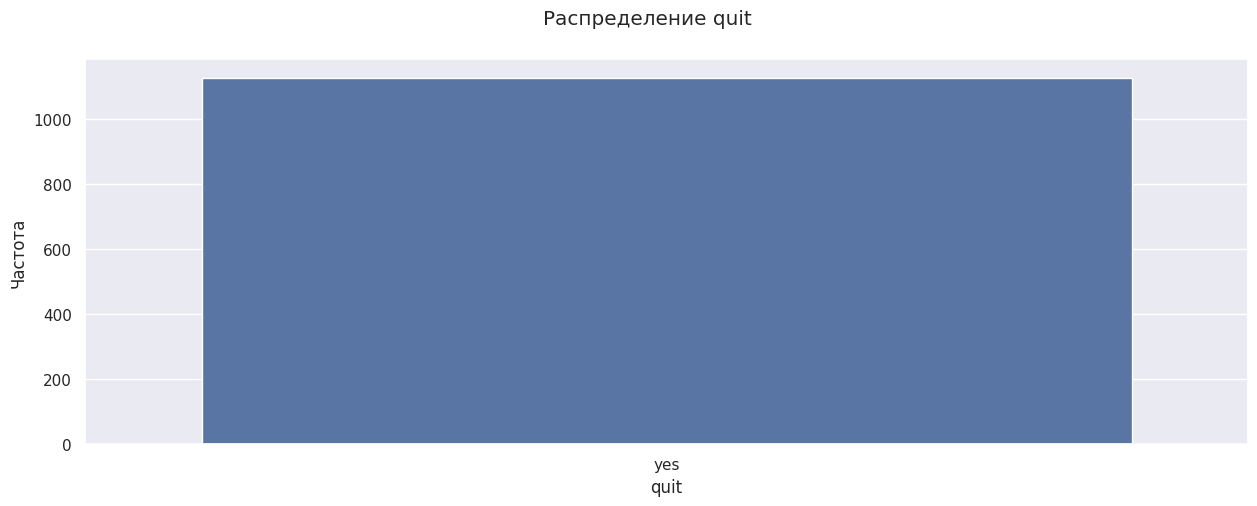

In [37]:
for name in train_quit.select_dtypes(include='object').columns.tolist():
    viz_cat_variable(train_quit[train_quit['quit'] == 'yes'], name)

- Уволившиеся сотрудники работают в среднем 1 год;
- Работу данных сотрудников руководитель оценивает на 3 из 5;
- Средняя зарплата 22 800;
- Больше всего сотрудников увольняется в отделе Продаж и Технологий. Меньше всего увольнений в отделе HR;
- Основная доля уволившихся сотрудников имели начальный уровень должности;
- Загрузка сотрудников была низкая и средняя;
- За последний год работы сотрудники не получали повышение;
- Нарушений трудового договора почти было.

#### Распределения признака `job_satisfaction_rate`

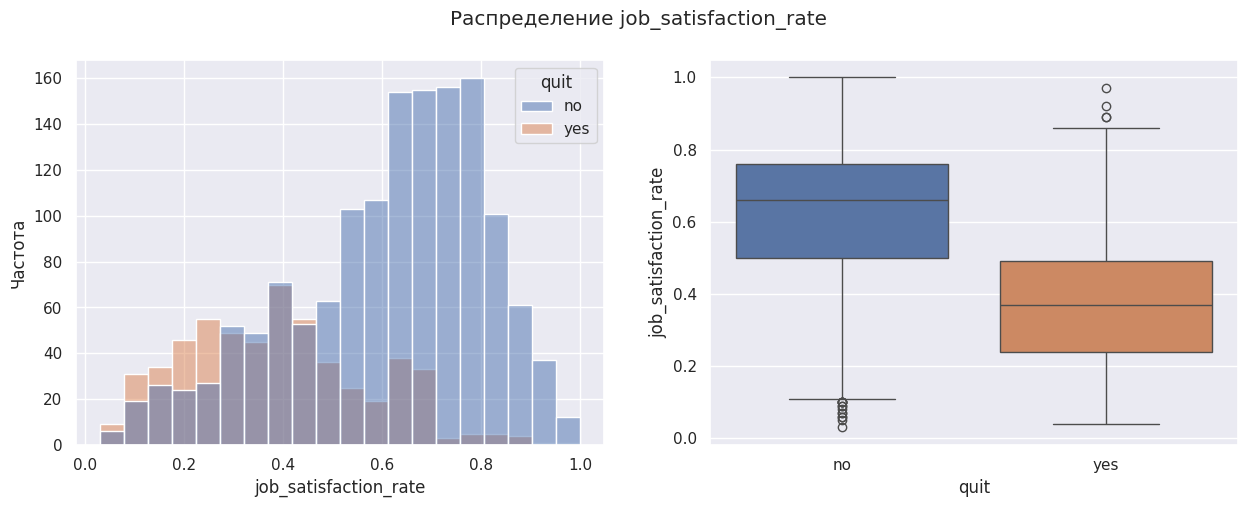

In [38]:
sns.set(rc={"figure.figsize": (15, 5)})

fig,axes=plt.subplots(1,2)

sns.histplot(
    data=test_features,
    x='job_satisfaction_rate',
    bins=20,
    hue='quit',
    ax=axes[0]
    )
axes[0].set(ylabel='Частота', xlabel='job_satisfaction_rate')

sns.boxplot(
    data=test_features,
    y='job_satisfaction_rate',
    x='quit',
    hue='quit',
    ax=axes[1]
    )
axes[1].set(ylabel='job_satisfaction_rate')

plt.suptitle(f'Распределение job_satisfaction_rate')
plt.show()

#### Выводы:
- Составлен портрет уволившегося сотрудника;
- Подтверждено утверждение о том, что уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник

### Добавление нового входного признака

In [39]:
train_quit['job_satisfaction_rate'] = best_model.predict(train_quit)
train_quit.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
0,723290,sales,middle,high,2,no,no,4,54000,no,0.631087
1,814010,sales,junior,medium,2,no,no,4,27600,no,0.843158
2,155091,purchasing,middle,medium,5,no,no,1,37200,no,0.340000
3,257132,sales,junior,medium,2,no,yes,3,24000,yes,0.367778
4,910140,marketing,junior,medium,2,no,no,5,25200,no,0.797857


### Подготовка данных

In [40]:
X_train = train_quit.drop(['quit', 'id'], axis=1)
y_train = train_quit['quit']
X_test = test_features.drop(['quit', 'id'], axis=1)
y_test = test_features['quit']

ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns = ['level', 'workload']
num_columns = [
    'employment_years',
    'supervisor_evaluation',
    'salary',
    'job_satisfaction_rate'
              ]

# создаём пайплайн для подготовки признаков
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False))
    ]
)

ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'],
                    ['low', 'medium', 'high']
                ],
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),

    ]
)

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns)
    ],
    remainder='passthrough'
)

### Обучение модели

#### Выбор лучшей модели и гиперпараметров

In [41]:
# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

# параметры для передачи GridSearchCV для поиска оптимальной модели
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 5),
        'models__max_features': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },

    # словарь для модели KNeighborsClassifier()
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE,
            solver='liblinear',
            penalty='l1'
        )],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

#### Проверка качества

In [42]:
#поиск оптимальной модели без перебора гиперпараметров
grid = GridSearchCV(
    pipe_final,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

#обучение модели на тренировочной выборке
grid.fit(X_train, y_train)

best_model_2 = grid.best_estimator_

#вывод лучшей модели
print('Лучшая модель и её параметры:\n\n', grid.best_params_)

#вывод метрики лучшей модели
print('Метрика ROC-AUC для лучшей модели:\n', grid.best_score_.round(3))

Лучшая модель и её параметры:

 {'models': LogisticRegression(C=1, penalty='l1', random_state=42, solver='liblinear'), 'models__C': 1, 'preprocessor__num': 'passthrough'}
Метрика ROC-AUC для лучшей модели:
 0.919


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [43]:
# вывод метрики лучшей модели
print(f'Метрика ROC-AUC лучшей модели на тестовой выборке: {round(roc_auc_score(y_test, best_model_2.predict_proba(X_test)[:,1]),3)}')

Метрика ROC-AUC лучшей модели на тестовой выборке: 0.91


### Выводы 2 задачи:

- Лучше всего справилась модель LogisticRegression(C=1, penalty='l1', random_state=42, solver='liblinear');
- Получена метрика `ROC-AUC` со значением на тестовой выборке - 0.91.

## Общие выводы:

**Для предсказания удовлетворенности сотрудников была подобрана лучшая модель, которая может помочь заказчику оптимизировать управление персоналом.**
- Проведено ииследование исходных данных и признаков;
- Построена модель с метрикой `SMAPE` не более 15;
- Отобрана лучшая модель на основе метрики - DecisionTreeRegressor(max_depth=12, max_features=8, random_state=42)
- Метрика `SMAPE` лучшей модели - 14.785.


**Построена модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.**
- Проведена обработка и исследованы исходные данные и признаки;
- Построен портрет уволившегося сотрудника
    - Работают в среднем 1 год;
    - Оценка работы руководителем на 3 из 5;
    - Средняя зарплата 22 800;
    - Больше всего сотрудников увольняется в отделе Продаж и Технологий. Меньше всего увольнений в отделе HR;
    - Имеют начальный уровень должности;
    - Низкий и средний уровень загрузки;
    - За последний год работы не получали повышение;
    - Нарушений трудового договора почти нет.
- Построена модель с метрикой `ROC-AUC` не менее 0.91;
- Отобрана лучшая модель на основе метрики - LogisticRegression(C=1, penalty='l1', random_state=42, solver='liblinear');
- Метрика `ROC-AUC` лучшей модели - 0.91.